#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Parameters  

In [2]:
csv_in = 'data.csv'

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph

#### Read CSV data  

In [3]:
df_all = pd.read_csv(csv_in, delimiter='\t', header=0)
print(df_all.shape)
print(df_all.info())
display(df_all.head())

(19719, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   race     19719 non-null  int64 
 1   age      19719 non-null  int64 
 2   engnat   19719 non-null  int64 
 3   gender   19719 non-null  int64 
 4   hand     19719 non-null  int64 
 5   source   19719 non-null  int64 
 6   country  19710 non-null  object
 7   E1       19719 non-null  int64 
 8   E2       19719 non-null  int64 
 9   E3       19719 non-null  int64 
 10  E4       19719 non-null  int64 
 11  E5       19719 non-null  int64 
 12  E6       19719 non-null  int64 
 13  E7       19719 non-null  int64 
 14  E8       19719 non-null  int64 
 15  E9       19719 non-null  int64 
 16  E10      19719 non-null  int64 
 17  N1       19719 non-null  int64 
 18  N2       19719 non-null  int64 
 19  N3       19719 non-null  int64 
 20  N4       19719 non-null  int64 
 21  N5       19719 non-null

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


For simplicity, we will only use variables starting with 'N' and 'E'.

In [4]:
df = df_all.loc[:, 'E1':'N10']

#### Factor analysis  

In [5]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
fa.fit(df.values)

FactorAnalyzer(method='ml', n_factors=2, rotation='varimax', rotation_kwargs={})

#### Correlation matrix 

In [6]:
df_corr = df.corr(method='pearson')
display(df_corr)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
E1,1.000000,-0.421009,0.474275,-0.483781,0.479101,-0.346676,0.588100,-0.366534,0.455476,-0.414282,-0.113651,0.151386,-0.119553,0.135326,-0.071058,-0.101821,-0.045938,-0.054888,-0.092058,-0.194235
E2,-0.421009,1.000000,-0.445537,0.527723,-0.539518,0.570819,-0.479932,0.373481,-0.364713,0.463642,0.060808,-0.029237,0.057949,-0.065595,0.044101,0.041922,0.037769,0.053351,0.046099,0.188779
E3,0.474275,-0.445537,1.000000,-0.481006,0.590660,-0.393412,0.579883,-0.320097,0.423473,-0.473928,-0.234579,0.281804,-0.198323,0.199955,-0.183207,-0.221093,-0.210228,-0.234068,-0.251364,-0.360656
E4,-0.483781,0.527723,-0.481006,1.000000,-0.510068,0.474928,-0.503229,0.446221,-0.450755,0.510477,0.154786,-0.088983,0.180651,-0.114245,0.128268,0.154214,0.138420,0.145239,0.149071,0.277181
E5,0.479101,-0.539518,0.590660,-0.510068,1.000000,-0.480675,0.630796,-0.344639,0.416147,-0.542389,-0.126033,0.132877,-0.094317,0.115515,-0.101736,-0.119409,-0.102190,-0.121051,-0.141739,-0.240457
E6,-0.346676,0.570819,-0.393412,0.474928,-0.480675,1.000000,-0.405476,0.320371,-0.330175,0.412007,0.107439,-0.050832,0.088337,-0.052615,0.138333,0.127916,0.112145,0.121092,0.121757,0.202192
E7,0.588100,-0.479932,0.579883,-0.503229,0.630796,-0.405476,1.000000,-0.344825,0.433230,-0.533139,-0.140447,0.155820,-0.131736,0.130521,-0.109312,-0.142770,-0.092573,-0.113498,-0.146747,-0.240949
E8,-0.366534,0.373481,-0.320097,0.446221,-0.344639,0.320371,-0.344825,1.000000,-0.514314,0.380939,0.089123,-0.051126,0.112310,-0.082313,0.042486,0.054127,0.021320,0.021223,0.069231,0.133073
E9,0.455476,-0.364713,0.423473,-0.450755,0.416147,-0.330175,0.433230,-0.514314,1.000000,-0.371440,-0.128761,0.135756,-0.111499,0.119811,-0.061148,-0.083486,-0.025855,-0.044048,-0.074122,-0.154636
E10,-0.414282,0.463642,-0.473928,0.510477,-0.542389,0.412007,-0.533139,0.380939,-0.371440,1.000000,0.181037,-0.092602,0.200157,-0.113060,0.149534,0.177927,0.161981,0.157125,0.204016,0.248718


#### Eigenvalues 

In [7]:
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0     6.212833
1     3.644590
2     1.118892
3     0.975735
4     0.867210
5     0.771777
6     0.682567
7     0.657669
8     0.566297
9     0.537943
10    0.490574
11    0.478122
12    0.443051
13    0.429617
14    0.418114
15    0.393774
16    0.389785
17    0.364432
18    0.332415
19    0.224603
dtype: float64
0     5.681696
1     3.116674
2     0.517423
3     0.343824
4     0.283700
5     0.191953
6     0.063696
7     0.035135
8     0.021259
9    -0.040572
10   -0.051418
11   -0.073279
12   -0.099388
13   -0.116816
14   -0.157720
15   -0.162723
16   -0.165454
17   -0.184851
18   -0.199457
19   -0.223007
dtype: float64


#### Scree plot

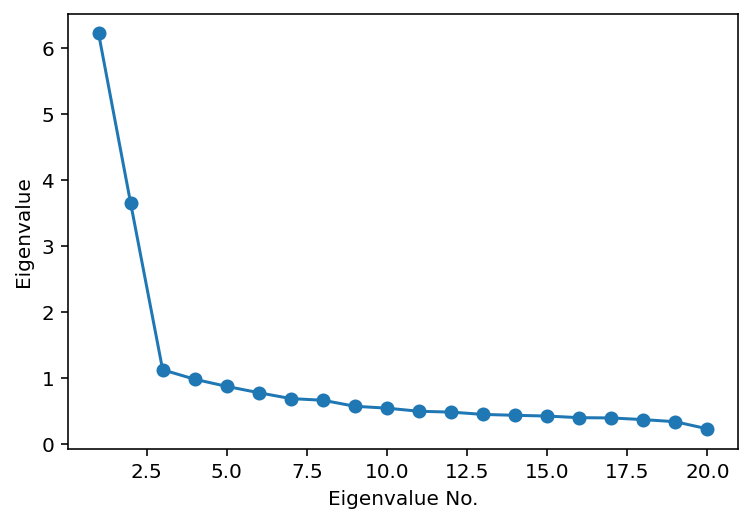

In [8]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

**Number of factors: 2 seems to be appropriate because the 3rd eigenvalue is less than 1 and also the graph becomes gently-sloping at the second eigenvalue.** 

#### Loadings  

In [9]:
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=df.columns,
                           columns=['Factor1','Factor2'])
display(df_loadings)

,Factor1,Factor2
E1,-0.666553,-0.064126
E2,0.694819,0.006995
E3,-0.676635,-0.272245
E4,0.701663,0.144984
E5,-0.761051,-0.103995
E6,0.599716,0.101088
E7,-0.754108,-0.115236
E8,0.537738,0.022203
E9,-0.597658,-0.049602
E10,0.659790,0.179393


#### Scores

In [10]:
scores = fa.transform(df)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2'])
print(df_scores.shape)
display(df_scores.head())

(19719, 2)


,Factor1,Factor2
0,-1.173709,-1.941748
1,0.791775,-0.175180
2,-0.693012,1.970709
3,0.639294,1.422319
4,-0.260435,0.088783


#### Uniquenesses

In [11]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=df.columns)
print(ser_uniqueness)

E1     0.551595
E2     0.517177
E3     0.468048
E4     0.486648
E5     0.409986
E6     0.630122
E7     0.418043
E8     0.710345
E9     0.640344
E10    0.532495
N1     0.556803
N2     0.742073
N3     0.670462
N4     0.869682
N5     0.700909
N6     0.447225
N7     0.433645
N8     0.386200
N9     0.501609
N10    0.545910
dtype: float64


**Not so high uniqueness for almost all data,  so all data are somehow affected by the common factors**

#### Contribution of each factor 

In [12]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1', 'Factor2'])
display(df_fa_var)

,Factor1,Factor2
var,4.586239,4.194437
prop_var,0.229312,0.209722
cum_var,0.229312,0.439034


**43.9% of total variance can be considered by Factor1 and Factor2**  

#### Draw biplot:

In [13]:
# slightly modified from biplot() in pca_and_biplot.ipynb of DM-08
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1.5
    r2 = 1.01
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=20)
    for i in range(len(score_2d)):
        plt.scatter(score_2d[i,0], score_2d[i,1], s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

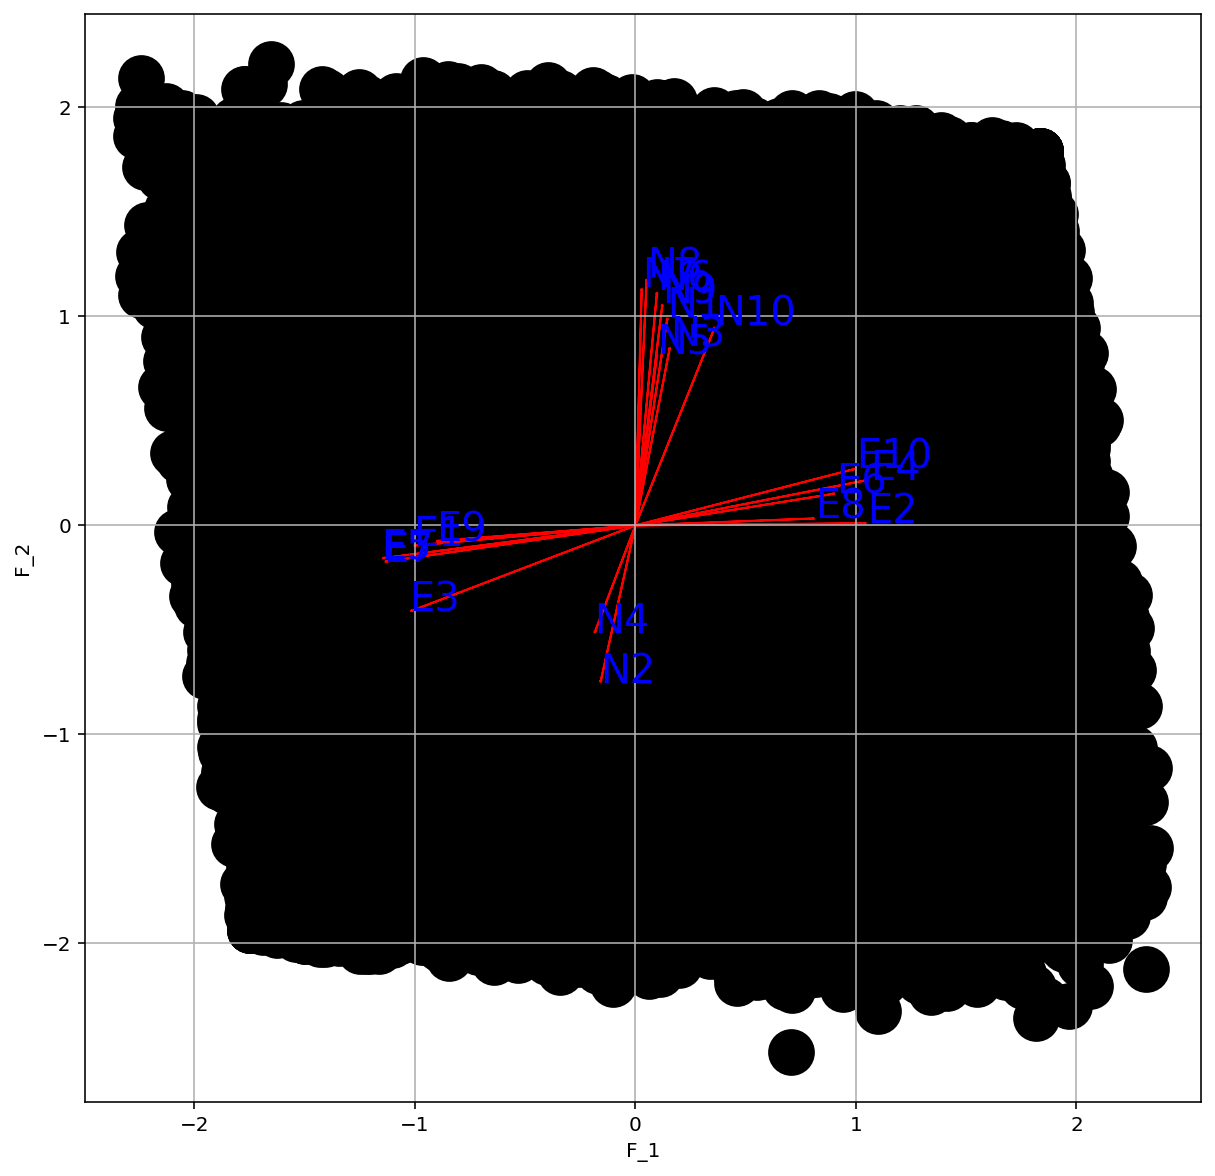

In [14]:
biplot_fa(scores, loadings, load_labels=df.columns)

#### Conclusion: 

1. Data is scattered around with only 43.9% of variance being explained by the first two common factors.
2. It's clear that all variables 'E' are closely correlated to common factor 1, and variables 'N' closely correlated to common factor 2; which is in line with how we set up the data collection (items with the same alphabet are related to the same aspect of personality trait).
3. Meaning of each common factor:

> Common factor 1: communication with others 

> Common factor 2: mood control 